# Gradient Descent

#### KR: "The most important algorithm in Machine Learning!"

In e.g. linear regression, we want to find the parameters that provide the best fit to our data. To do that we need:

1. A measure of how well our model is performing. In machine learning that's normally known as a **loss function**. If our model is performing well, we want the loss function to be small in value. If the model isn't performing well, we want the loss function to reflect that and be large. Did you see a loss function yesterday that satisfies this?

$$ L(w) = MSE = \frac{1}{N}\sum((y_{pred}-y_{true})^2) $$

2. A way to change our model parameters in a way that gets us from a model that isn't performing well, to a model that performs well -- a model which minimizes the loss function. In the general case this is called an **optimization algorithm**; today we'll look at a particular type of optimization algorithm called gradient descent.

$$ \Delta w = -\alpha \nabla L(w)$$ 
$$ w_{new} = w_{old} + \Delta w $$

_How does the algorithm work?_

a. Start with some random values for our parameters, $w$

b. In each iteration:

1. Calculate loss function, MSE
$$ L(w) = MSE = \frac{1}{N}\sum((y_{pred}-y_{true})^2) $$
2. Use loss function to calculate by how much to change parameters
$$ \Delta w = -\alpha \nabla L(w)$$ 
3. Update parameter values
$$ w_{new} = w_{old} + \Delta w $$

For *linear regression* with one parameter, your loss function will look like a simple parabola. 

1. Approaching from the right:
    * Gradient / slope of the tangent is positive
    * $\Delta w$ is negative
    * $w_{new}$ < $w_{old}$

2. Approaching from the left:
    * Gradient is negative
    * $\Delta w$ is positive
    * $w_{new}$ > $w_{old}$
    
-> Gradient descent makes sense!

Let's now try to implement gradient descent ourselves.

## Gradient Descent from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['font.size'] = 14

### Step 0: _create data_

Let's first create some data points following roughly the line:

$$ y = -1.5 + 2.0x $$

In [2]:
slope=2
intercept=-1.5

np.random.seed(101)

In [3]:
x=np.random.normal(0,1,400)

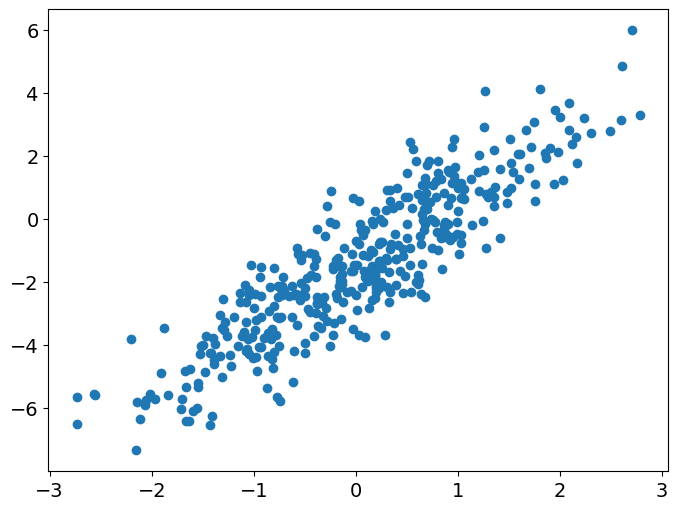

In [4]:
ytrue=slope*x+intercept + np.random.normal(0,1,len(x))
plt.scatter(x, ytrue)

### Step 1: _make line_

We'd now like to create a function that for a list of values (`x`) returns the predicted value of y (`ypred`) given a slope (`w1`) and an intercept (`w0`).

In [5]:
def make_line(x, w0, w1):  
    ypred = x*w1+w0
    return ypred

In [6]:
x2=np.array([-5,5])


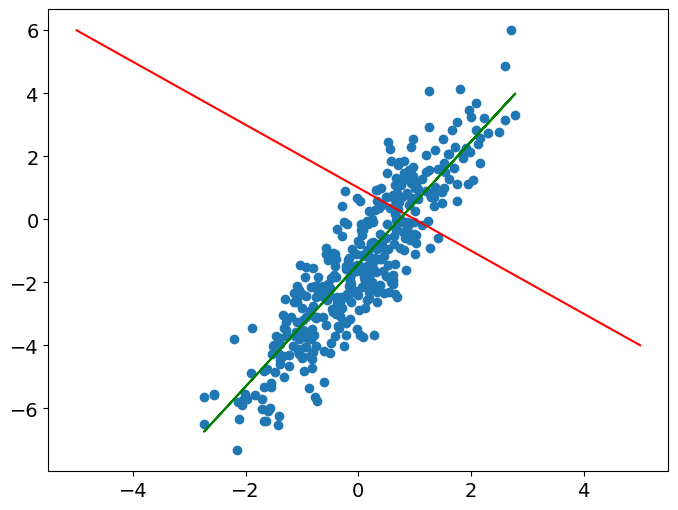

In [7]:
plt.scatter(x, ytrue)
plt.plot(x2, make_line(x2, 1,-1), "r-")
plt.plot(x, make_line(x, -1.4213395360059824, 1.9439662012067327), "g-")

### Step 2: _calculate loss function_

We already defined our loss function above. Let's now code it.

$$ MSE = \frac{1}{n} \sum (y_{true}-y_{pred})^2 $$

In [8]:
def mse(ytrue, ypred):
    error = np.mean((ytrue-ypred)**2)
    return error

In [9]:
# testing
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

### Step 3: _calculate gradient_

To calculate the first derivative, use the definition of the derivative:

$$ f'(x) \approx \frac{f(x+h)-f(h)}{h} $$

Tips:
* You may want to use the functions you defined above
* We are calculating partial derivatives of the loss function with respect to the parameters, so when tweaking w0 we're keeping w1 constant, and vice versa.

In [10]:
def calc_gradient(x, ytrue, w0, w1):

    dw = 0.0001
    ypred = x * w1 + w0

    '''tweak first parameter'''
    w1_change = w1 + dw
    # calculate predictions using w0 and w1_change
    ypred_w1 = x * w1_change + w0
    deriv_w1 = (mse(ytrue, ypred_w1) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    w0_change = w0 + dw
    # calculate predictions using w0_change and w1
    ypred_w0 = x * w1 + w0_change
    deriv_w0 = (mse(ytrue, ypred_w0) - mse(ytrue, ypred)) / dw

    return [deriv_w0,deriv_w1] # return both derivations as a list

### Step 4: _implement gradient descent_

Repeat the following steps `MAX_ITER`times.
In each iteration of the loop:

      1. Calculate the gradient of the loss function
         with respect to each model parameter.
      2. If the gradient becomes really close to zero,
         break out of the loop.
      3. For each model parameter,
         - calculate the updated parameter value using the formula from above.
         - overwrite the value with its updated value.
      4. Print all variables to check if they
         are converging to their expected values.


In [12]:
def plot_iteration(i, w0s,w1s,line="k-", closefig=True):
    fig=plt.figure(figsize=(10,5))
    
    ax=fig.add_subplot(122)    
    ax.scatter(x, ytrue)
    x2=np.array([-5,5])
    ax.plot(x2, make_line(x2, w0, w1), line)
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-10,10)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax2=fig.add_subplot(121)   
    
    ax2.plot(all_w0s,"o", color="grey", alpha=0.3)
    ax2.plot(all_w1s, "o", color="grey", alpha=0.3 )
    
    ax2.plot(w0s,"o", label="w0", color="C0")
    ax2.plot(w1s, "o", label="w1", color="C1" )
    ax2.legend(loc=4)
    ax2.set_ylim(-10,3)
    ax2.set_xlim(-2,35)
    ax2.set_ylabel("w0/w1")
    ax2.set_xlabel("Iteration")
    plt.suptitle("LR_iteration_"+str(i).zfill(3))  
    
    plt.tight_layout()
    
    plt.savefig("./figs/LR/LR_iteration_"+str(i).zfill(3)+".png")
    
    if closefig: plt.close()
#plot_iteration(20,w0s,w1s, closefig=False)
#plt.show()

In [15]:
w0 = -10.0 # arbitrary starting value
w1 = -10.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 5000
THRESHOLD = 0.01
w0s=[]
w1s=[]
for i in range(MAX_ITER):
    
    # 1. Calculate the gradient of the loss function with respect to each model parameter.
    deriv_w0, deriv_w1 = calc_gradient(x, ytrue, w0, w1)
    
    # 2. If the gradient becomes really close to zero, break out of the loop.
    if np.abs(deriv_w0) < THRESHOLD and np.abs(deriv_w1) < THRESHOLD:
        break
        
    # 3. For each model parameter,
    else:
    # - calculate the updated parameter value using the formula from above.
        w0_new = w0 - deriv_w0 * LR
        w1_new = w1 - deriv_w1 * LR
    # - overwrite the value with its updated value.
        w0 = w0_new
        w1 = w1_new
        
    # 4. Print all variables to check if they are converging to their expected values.

    
    
    w0s.append(w0)
    w1s.append(w1)
    
    if np.abs(deriv_w1) > 50*THRESHOLD: 
        line="r-"
    elif np.abs(deriv_w1) > 3*THRESHOLD and np.abs(deriv_w1) > 1.5*THRESHOLD: 
        line="k-"
    else:
        line="g-"
    print(w0,w1, len(w0s),len(w1s))    
    plot_iteration(i, w0s,w1s, line=line)    
    
    
    # BONUS I. Plot your data and your model and see how it converges.
    # You can use imageio library you learned about in week 1 to create an animated gif.

    # BONUS II. Change the learning rate alpha from very small to very large 
    # and see how your gradient descent changes.

-8.216228165290431 -7.3077611330438685 1 1
-6.808298790853087 -5.218252697583239 2 2
-5.696769999028675 -3.5967038348394453 3 3
-4.819043819141768 -2.338445933931723 4 4
-4.125783979725952 -1.362195414019709 5 5
-3.5780977678057013 -0.6048341804236657 6 6
-3.1453185231013947 -0.0173540782333248 7 7
-2.8032603873955253 0.43829403947249546 8 8
-2.532844444254714 0.7916482500538535 9 9
-2.319016986815239 1.0656372212241116 10 10
-2.149897614856613 1.2780573966726472 11 11
-2.0161081857825636 1.442720372941917 12 12
-1.9102441103502255 1.5703440371179855 13 13
-1.8264577074602517 1.6692446369197622 14 14
-1.76012979480066 1.7458742092204638 15 15
-1.7076107717492928 1.8052378868500618 16 16
-1.666016444423093 1.851217904592426 17 17
-1.6330669829334088 1.8868251421184734 18 18
-1.606959870639404 1.9143943920809736 19 19
-1.5862696480131078 1.9357359286607068 20 20
-1.5698687823555346 1.9522531445845903 21 21
-1.5568651976249814 1.9650338434884596 22 22
-1.5465529455647076 1.974921079956901

In [14]:
all_w0s=w0s
all_w1s=w1s

In [16]:
import glob
import imageio.v2 as io

imagefiles=sorted(glob.glob("./figs/LR/LR_it*.png"))

images=[]
for imfile in imagefiles:
    images.append(io.imread(imfile))

io.mimsave("Linear_Regression.gif", images, fps=2)

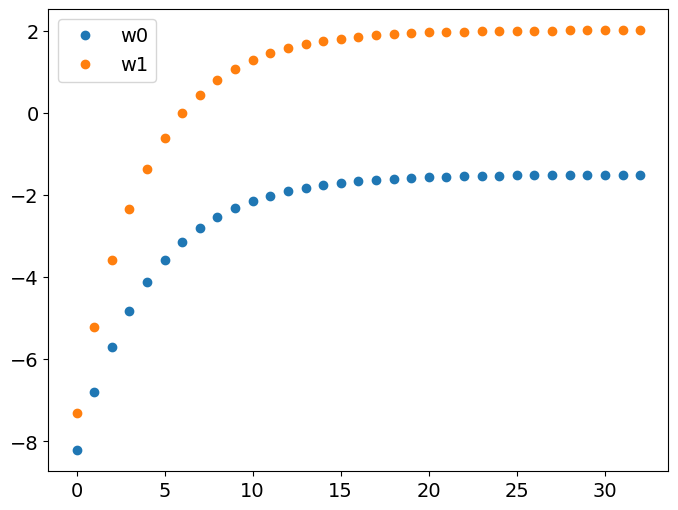

In [17]:
plt.plot(w0s,"o", label="w0")
plt.plot(w1s, "o", label="w1" )
plt.legend()

In [18]:
from IPython.display import Image
Image(url='./Linear_Regression.gif')  
